In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib
%matplotlib inline

def get_csvfile_pd(url, cols = None):
    
    path = '../input/'
    name = url.rsplit('/', 1)[-1]
    csvfile = ''.join([path,name]) 
    hdffile = ''.join([path,name,'.h5'])            

    if not os.path.exists(csvfile) and not os.path.exists(hdffile):
        urllib.urlretrieve(url, csvfile)
    
    if os.path.exists(csvfile) and not os.path.exists(hdffile):
        df = pd.read_csv(csvfile, sep='\t', usecols=cols, error_bad_lines=False)
        df.to_hdf(hdffile,'openfood')
        #os.remove(csvfile)
        return df
    
    if os.path.exists(hdffile):
        return pd.read_hdf(hdffile)#, columns=colselection)
    
    raise Exception('Could find the data in specified location!')

In [2]:
#selecting columns
colselection = ['product_name', 'quantity', 'packaging', 'main_category_en',
                'energy_100g', 'fat_100g','carbohydrates_100g',
                'sugars_100g', 'fiber_100g', 'proteins_100g']

openfoodurl = 'http://world.openfoodfacts.org/data/en.openfoodfacts.org.products.csv'

food = get_csvfile_pd(url=openfoodurl, cols=colselection)

In [18]:
cats = food['main_category_en'].value_counts().reset_index()
cats = cats[cats['main_category_en'] > 100]
food = food[food['main_category_en'].isin(cats['index'])]

In [21]:
food['fatcal_100g'] = food['fat_100g'] * 9.3
food['carbcal_100g'] = food['carbohydrates_100g'] * 4.1
food['proteinscal_100g'] = food['proteins_100g'] * 4.1
food['energy_100g'] = food['energy_100g'] / 4.184

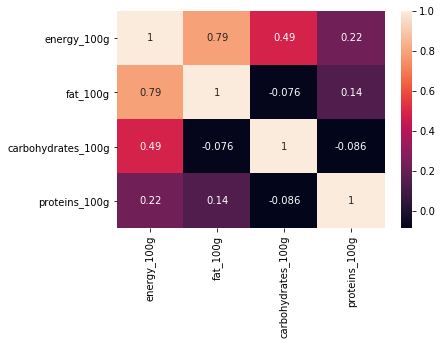

In [23]:
# Calculate correlations
corr =food[['energy_100g', 'fat_100g','carbohydrates_100g','proteins_100g']].dropna().corr()
# Heatmap
sns.heatmap(corr,annot=True)

In [45]:
food.groupby('main_category_en')[['energy_100g']].mean().sort_values('energy_100g', ascending=False)

,energy_100g
main_category_en,
Fats,690.952305
Salty snacks,486.683268
Waffles,478.910850
Sugary snacks,451.447633
Spreads,450.816590
Fish and meat and eggs,434.871095
Breakfasts,388.095459
Pie dough,374.039165
Pies,364.304628


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

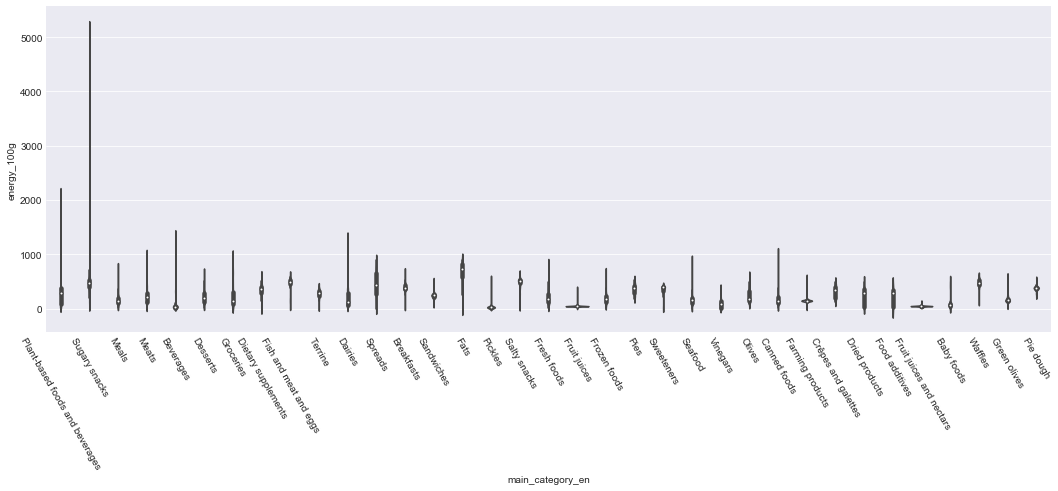

In [42]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,6))
sns.violinplot(x='main_category_en', y='energy_100g', data=food)
plt.xticks(rotation=-60)